In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input, concatenate
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

In [2]:
sns.set()

In [9]:
# 1️. Load and Explore Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
print(f"Training shape: {x_train.shape}, Test shape: {x_test.shape}")

Training shape: (60000, 28, 28), Test shape: (10000, 28, 28)


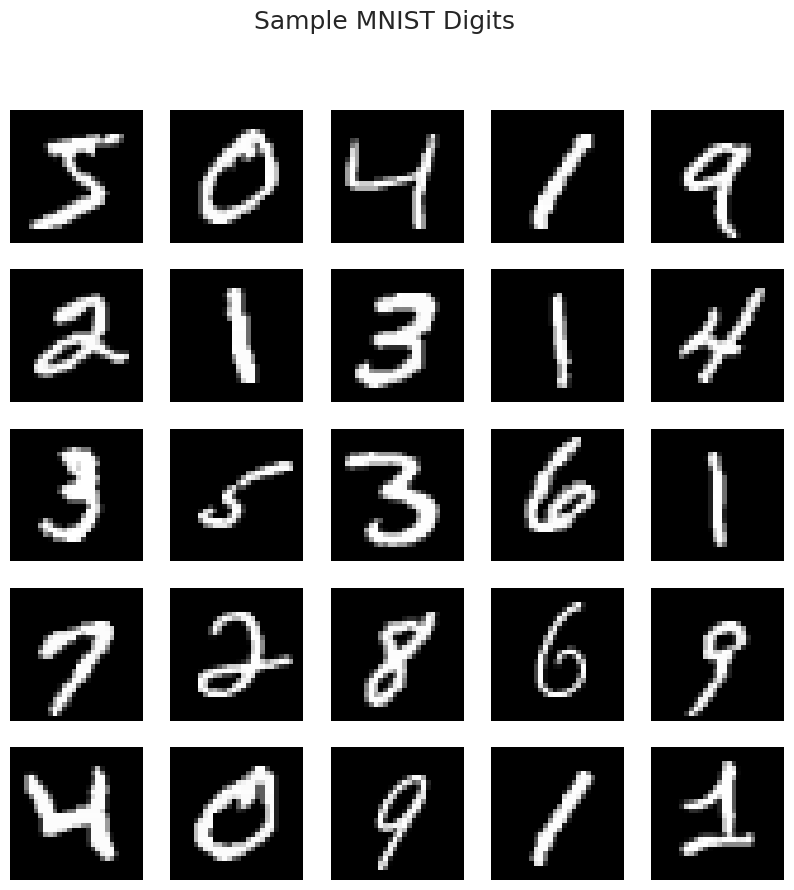

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.suptitle("Sample MNIST Digits", fontsize=18)
plt.show()

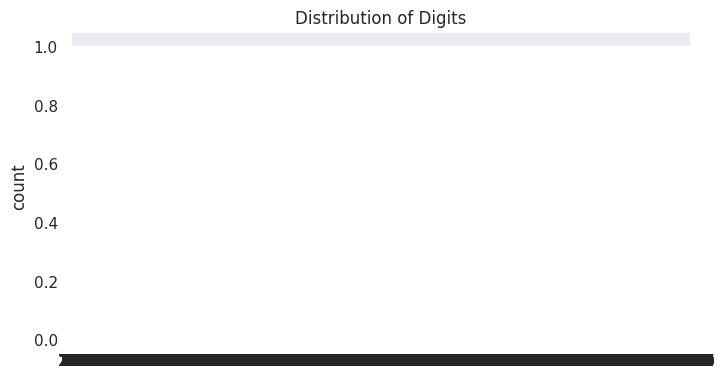

In [6]:
plt.figure(figsize=(8,4))
sns.countplot(y_train)
plt.title("Distribution of Digits")
plt.show()

In [7]:
# 2️. Preprocessing
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train_cnn = x_train.reshape(-1,28,28,1)
x_test_cnn = x_test.reshape(-1,28,28,1)

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [11]:
# 3️. Baseline Dense Model
model_dense = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model_dense.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history_dense = model_dense.fit(x_train, y_train_cat, epochs=10, batch_size=128, validation_split=0.2, verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
375/375 - 5s - 14ms/step - accuracy: 0.4579 - loss: 6.0208 - val_accuracy: 0.6788 - val_loss: 1.3122
Epoch 2/10
375/375 - 2s - 5ms/step - accuracy: 0.6050 - loss: 1.5298 - val_accuracy: 0.8024 - val_loss: 1.0229
Epoch 3/10
375/375 - 2s - 5ms/step - accuracy: 0.7047 - loss: 1.2614 - val_accuracy: 0.8438 - val_loss: 0.8807
Epoch 4/10
375/375 - 3s - 8ms/step - accuracy: 0.7519 - loss: 1.0878 - val_accuracy: 0.8706 - val_loss: 0.7780
Epoch 5/10
375/375 - 3s - 7ms/step - accuracy: 0.7810 - loss: 0.9844 - val_accuracy: 0.8936 - val_loss: 0.6889
Epoch 6/10
375/375 - 2s - 5ms/step - accuracy: 0.8107 - loss: 0.8769 - val_accuracy: 0.9083 - val_loss: 0.5996
Epoch 7/10
375/375 - 2s - 5ms/step - accuracy: 0.8321 - loss: 0.7945 - val_accuracy: 0.9196 - val_loss: 0.5625
Epoch 8/10
375/375 - 2s - 5ms/step - accuracy: 0.8545 - loss: 0.7131 - val_accuracy: 0.9197 - val_loss: 0.5029
Epoch 9/10
375/375 - 2s - 5ms/step - accuracy: 0.8665 - loss: 0.6651 - val_accuracy: 0.9281 - val_loss: 0.4610


In [12]:
# 4️. Advanced CNN Model with Regularization
model_cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1), kernel_regularizer=l2(0.001)),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_cnn.compile(optimizer=RMSprop(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

history_cnn = model_cnn.fit(x_train_cnn, y_train_cat, epochs=12, batch_size=128, validation_split=0.2, verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12
375/375 - 39s - 104ms/step - accuracy: 0.8455 - loss: 0.7389 - val_accuracy: 0.9634 - val_loss: 0.3240
Epoch 2/12
375/375 - 38s - 102ms/step - accuracy: 0.9487 - loss: 0.3465 - val_accuracy: 0.9757 - val_loss: 0.2351
Epoch 3/12
375/375 - 39s - 104ms/step - accuracy: 0.9605 - loss: 0.2617 - val_accuracy: 0.9772 - val_loss: 0.1906
Epoch 4/12
375/375 - 37s - 98ms/step - accuracy: 0.9665 - loss: 0.2168 - val_accuracy: 0.9808 - val_loss: 0.1597
Epoch 5/12
375/375 - 41s - 109ms/step - accuracy: 0.9713 - loss: 0.1862 - val_accuracy: 0.9835 - val_loss: 0.1409
Epoch 6/12
375/375 - 41s - 109ms/step - accuracy: 0.9721 - loss: 0.1697 - val_accuracy: 0.9855 - val_loss: 0.1299
Epoch 7/12
375/375 - 36s - 97ms/step - accuracy: 0.9745 - loss: 0.1575 - val_accuracy: 0.9852 - val_loss: 0.1208
Epoch 8/12
375/375 - 41s - 110ms/step - accuracy: 0.9763 - loss: 0.1468 - val_accuracy: 0.9848 - val_loss: 0.1178
Epoch 9/12
375/375 - 42s - 112ms/step - accuracy: 0.9765 - loss: 0.1409 - val_accuracy: 0.

In [13]:
# 5️. Ensemble Model
input_layer = Input(shape=(28,28,1))

cnn_branch = Conv2D(32, (3,3), activation='relu')(input_layer)
cnn_branch = MaxPooling2D((2,2))(cnn_branch)
cnn_branch = Flatten()(cnn_branch)

flatten_branch = Flatten()(input_layer)
dense_branch = Dense(64, activation='relu')(flatten_branch)

merged = concatenate([cnn_branch, dense_branch])
final_dense = Dense(128, activation='relu')(merged)
output = Dense(10, activation='softmax')(final_dense)

ensemble_model = Model(inputs=input_layer, outputs=output)
ensemble_model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

ensemble_model.fit(x_train_cnn, y_train_cat, epochs=8, batch_size=128, validation_split=0.2, verbose=2)

Epoch 1/8
375/375 - 23s - 60ms/step - accuracy: 0.9319 - loss: 0.2334 - val_accuracy: 0.9722 - val_loss: 0.0971
Epoch 2/8
375/375 - 23s - 61ms/step - accuracy: 0.9792 - loss: 0.0718 - val_accuracy: 0.9797 - val_loss: 0.0685
Epoch 3/8
375/375 - 40s - 107ms/step - accuracy: 0.9864 - loss: 0.0460 - val_accuracy: 0.9833 - val_loss: 0.0579
Epoch 4/8
375/375 - 23s - 61ms/step - accuracy: 0.9904 - loss: 0.0323 - val_accuracy: 0.9858 - val_loss: 0.0540
Epoch 5/8
375/375 - 40s - 106ms/step - accuracy: 0.9927 - loss: 0.0232 - val_accuracy: 0.9833 - val_loss: 0.0574
Epoch 6/8
375/375 - 21s - 55ms/step - accuracy: 0.9951 - loss: 0.0168 - val_accuracy: 0.9835 - val_loss: 0.0546
Epoch 7/8
375/375 - 43s - 113ms/step - accuracy: 0.9964 - loss: 0.0122 - val_accuracy: 0.9847 - val_loss: 0.0589
Epoch 8/8
375/375 - 40s - 108ms/step - accuracy: 0.9974 - loss: 0.0092 - val_accuracy: 0.9854 - val_loss: 0.0578


In [14]:
# 6️. Data Augmentation
augmenter = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)

aug_model = tf.keras.models.clone_model(model_cnn)
aug_model.compile(optimizer=Adam(0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

aug_model.fit(augmenter.flow(x_train_cnn, y_train_cat, batch_size=64), epochs=5, validation_data=(x_test_cnn, y_test_cat), verbose=2)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 - 64s - 69ms/step - accuracy: 0.7707 - loss: 0.9060 - val_accuracy: 0.9689 - val_loss: 0.2871
Epoch 2/5
938/938 - 62s - 66ms/step - accuracy: 0.9058 - loss: 0.4806 - val_accuracy: 0.9797 - val_loss: 0.2209
Epoch 3/5
938/938 - 62s - 66ms/step - accuracy: 0.9233 - loss: 0.4011 - val_accuracy: 0.9855 - val_loss: 0.1908
Epoch 4/5
938/938 - 60s - 64ms/step - accuracy: 0.9331 - loss: 0.3586 - val_accuracy: 0.9877 - val_loss: 0.1711
Epoch 5/5
938/938 - 83s - 88ms/step - accuracy: 0.9386 - loss: 0.3309 - val_accuracy: 0.9859 - val_loss: 0.1637


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


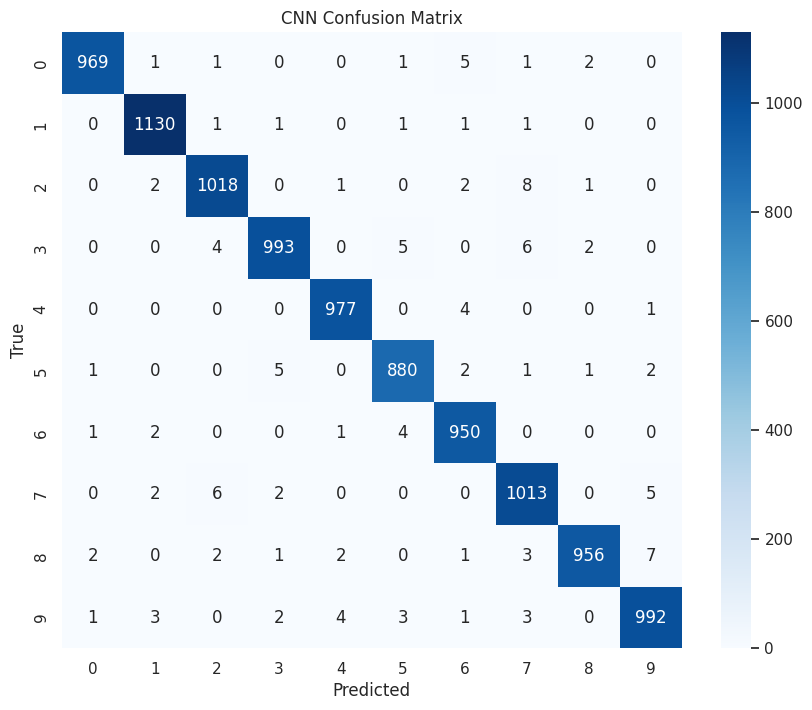

In [15]:
# 7️. Evaluation and Error Analysis
y_pred = np.argmax(model_cnn.predict(x_test_cnn), axis=1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



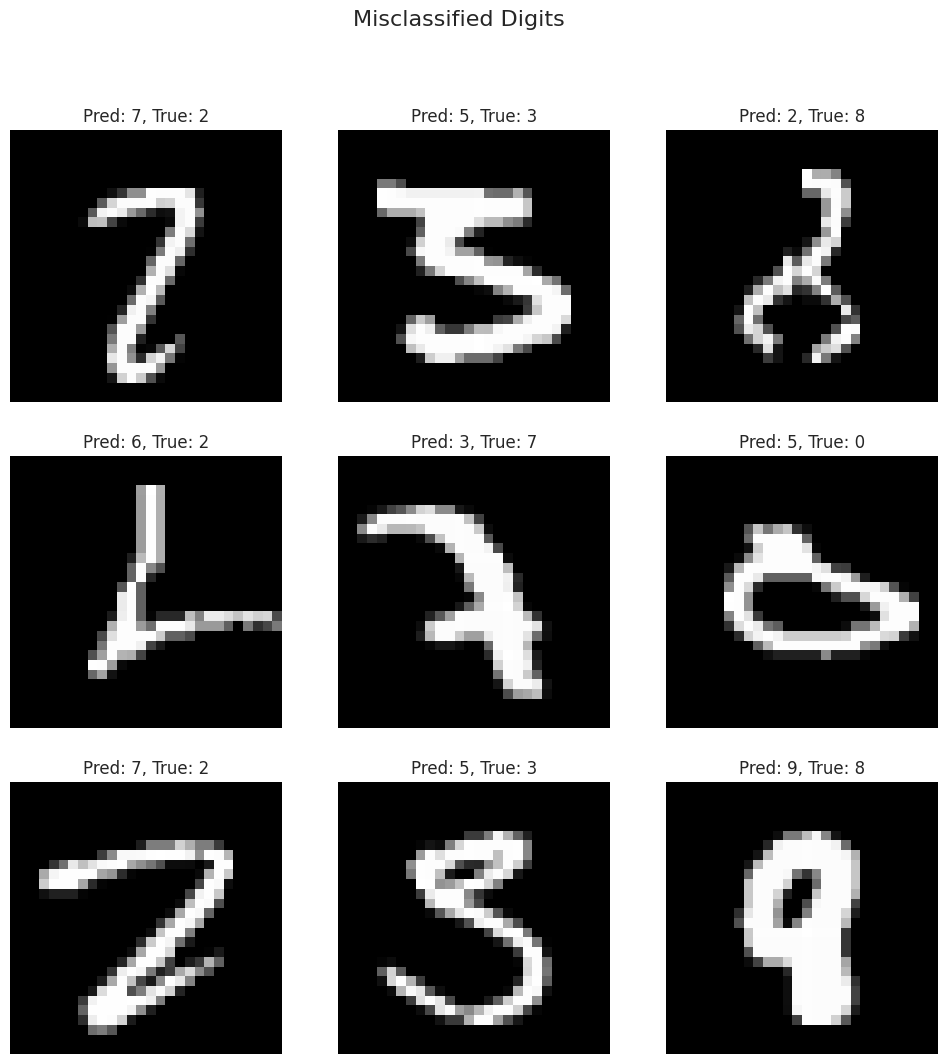

In [17]:
errors = np.where(y_pred != y_test)[0]
plt.figure(figsize=(12,12))
for i, idx in enumerate(errors[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"Pred: {y_pred[idx]}, True: {y_test[idx]}")
    plt.axis('off')
plt.suptitle("Misclassified Digits", fontsize=16)
plt.show()

In [20]:
# 8️. Interpretability with Grad-CAM
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        pred_index = tf.argmax(predictions[0])
        loss = predictions[:, pred_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [28]:
for i, layer in enumerate(model_cnn.layers):
    print(i, layer.name, layer.__class__.__name__)

0 conv2d Conv2D
1 max_pooling2d MaxPooling2D
2 dropout_2 Dropout
3 conv2d_1 Conv2D
4 max_pooling2d_1 MaxPooling2D
5 flatten_1 Flatten
6 dense_3 Dense
7 dropout_3 Dropout
8 dense_4 Dense


In [31]:
conv_layers = [layer for layer in model_cnn.layers if isinstance(layer, Conv2D)]
print([layer.name for layer in conv_layers])
target_layer_name = conv_layers[-1].name

['conv2d', 'conv2d_1']


In [33]:
inputs = Input(shape=(28,28,1))
x = Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.001))(inputs)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.3)(x)
x = Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.001))(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)

model_cnn = Model(inputs, outputs)
model_cnn.compile(optimizer=RMSprop(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
history_cnn = model_cnn.fit(x_train_cnn, y_train_cat, epochs=12, batch_size=128, validation_split=0.2, verbose=2)

Epoch 1/12
375/375 - 48s - 128ms/step - accuracy: 0.8363 - loss: 0.7608 - val_accuracy: 0.9616 - val_loss: 0.3280
Epoch 2/12
375/375 - 74s - 198ms/step - accuracy: 0.9455 - loss: 0.3534 - val_accuracy: 0.9749 - val_loss: 0.2361
Epoch 3/12
375/375 - 40s - 106ms/step - accuracy: 0.9589 - loss: 0.2706 - val_accuracy: 0.9772 - val_loss: 0.1951
Epoch 4/12
375/375 - 41s - 108ms/step - accuracy: 0.9659 - loss: 0.2234 - val_accuracy: 0.9816 - val_loss: 0.1624
Epoch 5/12
375/375 - 41s - 110ms/step - accuracy: 0.9690 - loss: 0.1955 - val_accuracy: 0.9811 - val_loss: 0.1465
Epoch 6/12
375/375 - 41s - 109ms/step - accuracy: 0.9724 - loss: 0.1773 - val_accuracy: 0.9845 - val_loss: 0.1327
Epoch 7/12
375/375 - 41s - 109ms/step - accuracy: 0.9740 - loss: 0.1628 - val_accuracy: 0.9840 - val_loss: 0.1275
Epoch 8/12
375/375 - 42s - 113ms/step - accuracy: 0.9747 - loss: 0.1528 - val_accuracy: 0.9855 - val_loss: 0.1197
Epoch 9/12
375/375 - 40s - 106ms/step - accuracy: 0.9761 - loss: 0.1444 - val_accuracy: 

In [35]:
conv_layers = [layer for layer in model_cnn.layers if isinstance(layer, Conv2D)]
target_layer_name = conv_layers[-1].name
print(target_layer_name)

conv2d_4


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_35']]
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


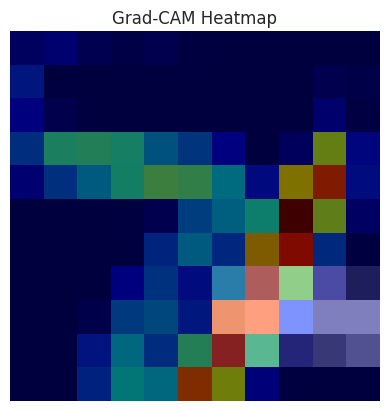

In [36]:
sample_image = np.expand_dims(x_test_cnn[0], axis=0)

heatmap = make_gradcam_heatmap(sample_image, model_cnn, target_layer_name)

plt.imshow(x_test[0], cmap='gray')
plt.imshow(heatmap, cmap='jet', alpha=0.5)
plt.title("Grad-CAM Heatmap")
plt.axis('off')
plt.show()

In [37]:
#---------------------------------------------------------------------------#

In [38]:
## Handwritten Digit Recognition (MNIST)